In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import seaborn as sns
from train_test_divide import extract_spammers_scrapers, extract_normal

In [2]:
df_anomaly_train = pd.read_csv('csv_files/train.csv')
df_anomaly_test = pd.read_csv('csv_files/test.csv')

anomaly_inputs = ['request_freq', 'avg_tokens', 'longest_consec', 'var_score', 'sequence_time']
#anomaly_inputs = ['avg_tokens', 'var_score', 'longest_consec']

model_if = IsolationForest(contamination=0.002, random_state=42)
model_if.fit(df_anomaly_train[anomaly_inputs])

c:\Users\vhage\Documents\Skolarbete\Exjobb\request-analyzer-model\.venv\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.002, random_state=42)

In [3]:
#Code for checking how many spammers and scarpers that are present in test dataset
df_test = pd.read_csv('csv_files/test.csv')
df_test_spam = extract_spammers_scrapers(df_test)
df_test_spam

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
0,2.101296,2.0,15.0,203.095238,113.470,user-1003
1,2.696333,3.0,9.0,170.066667,145.602,user-1003
2,2.108796,2.0,15.0,179.095238,113.875,user-1003
3,2.227037,4.0,9.0,174.923810,120.260,user-1003
4,2.011852,2.0,16.0,210.523810,108.640,user-1003
...,...,...,...,...,...,...
2428,2.278302,2.0,14.0,171.028571,120.750,user-1004
2429,1.830566,4.0,10.0,223.980952,97.020,user-1004
2430,2.286226,2.0,10.0,181.314286,121.170,user-1004
2431,1.881509,2.0,10.0,187.314286,99.720,user-1004


In [4]:
#Code for checking how many normal users that are present in test dataset
df_test_normal = extract_normal(df_test, df_test_spam)
df_test_normal

,request_freq,avg_tokens,longest_consec,var_score,sequence_time,user
2433,725.085692,0.126316,3.0,13.714286,28278.342,user-726
2434,642.182480,0.111111,5.0,17.923810,32109.124,user-23
2435,119.602920,0.380952,4.0,16.923810,5980.146,user-23
2436,486.913143,0.100000,5.0,24.028571,23858.744,user-23
2437,317.534512,0.159091,3.0,17.266667,13018.915,user-17
...,...,...,...,...,...,...
2995,543.424755,0.103093,3.0,40.780952,28801.512,user-938
2996,512.759378,0.141026,4.0,30.095238,23074.172,user-863
2997,242.812396,0.275000,5.0,24.695238,11654.995,user-884
2998,6.971500,3.000000,4.0,30.638095,334.632,user-186


In [5]:
df_anomaly_test['anomaly_score'] = model_if.decision_function(df_anomaly_test[anomaly_inputs])
df_anomaly_test['anomaly'] = model_if.predict(df_anomaly_test[anomaly_inputs])

#This dataframe will only include anomaly score and anomaly label
df_anomaly_score = df_anomaly_test.loc[:,['anomaly_score', 'anomaly']]
df_anomaly_score['user'] = df_anomaly_test['user']
df_a = df_anomaly_score.loc[df_anomaly_score['anomaly']==-1] 
print(df_a)

"""
Test result:
Using all features:
    Sequence length: 15 with 8917 anomalies
        True positives = 2059
        False positives = 4
        True negatives = 1811
        False negatives = 6858

    Sequence length: 25 with 5351 anomalies
        True positives = 2011
        False positives = 11
        True negatives = 1128
        False negatives = 3340

    Sequence length: 35 with 3822 anomalies
        True positives = 2455
        False positives = 0
        True negatives = 835
        False negatives = 1367

    Sequence length: 45 with 2973 anomalies
        True positives = 1972
        False positives = 0
        True negatives = 672
        False negatives = 1001 

    Sequence length: 55 with 2433 anomalies
        True positives = 2246
        False positives = 0
        True negatives = 567
        False negatives = 187        
"""



      anomaly_score  anomaly        user
0         -0.021155       -1   user-1003
1         -0.001665       -1   user-1003
2         -0.021155       -1   user-1003
3         -0.022089       -1   user-1003
4         -0.017666       -1   user-1003
...             ...      ...         ...
2428      -0.022448       -1   user-1004
2429      -0.037634       -1   user-1004
2430      -0.010016       -1   user-1004
2431      -0.005785       -1   user-1004
2432      -0.047965       -1   user-1004

[2246 rows x 3 columns]


'\nTest result:\nUsing all features:\n    Sequence length: 15 with 8917 anomalies\n        True positives = 2059\n        False positives = 4\n        True negatives = 1811\n        False negatives = 6858\n\n    Sequence length: 25 with 5351 anomalies\n        True positives = 2011\n        False positives = 11\n        True negatives = 1128\n        False negatives = 3340\n\n    Sequence length: 35 with 3822 anomalies\n        True positives = 2455\n        False positives = 0\n        True negatives = 835\n        False negatives = 1367\n\n    Sequence length: 45 with 2973 anomalies\n        True positives = 1972\n        False positives = 0\n        True negatives = 672\n        False negatives = 1001    \n'

In [6]:
#To check which users thar are flagged as anomalies
print(set(df_a['user'].to_list()))
#print(df_anomaly_test.loc[df_anomaly_test['user']== ' user-693'])

{' user-1004', ' user-1003', ' user-1005'}


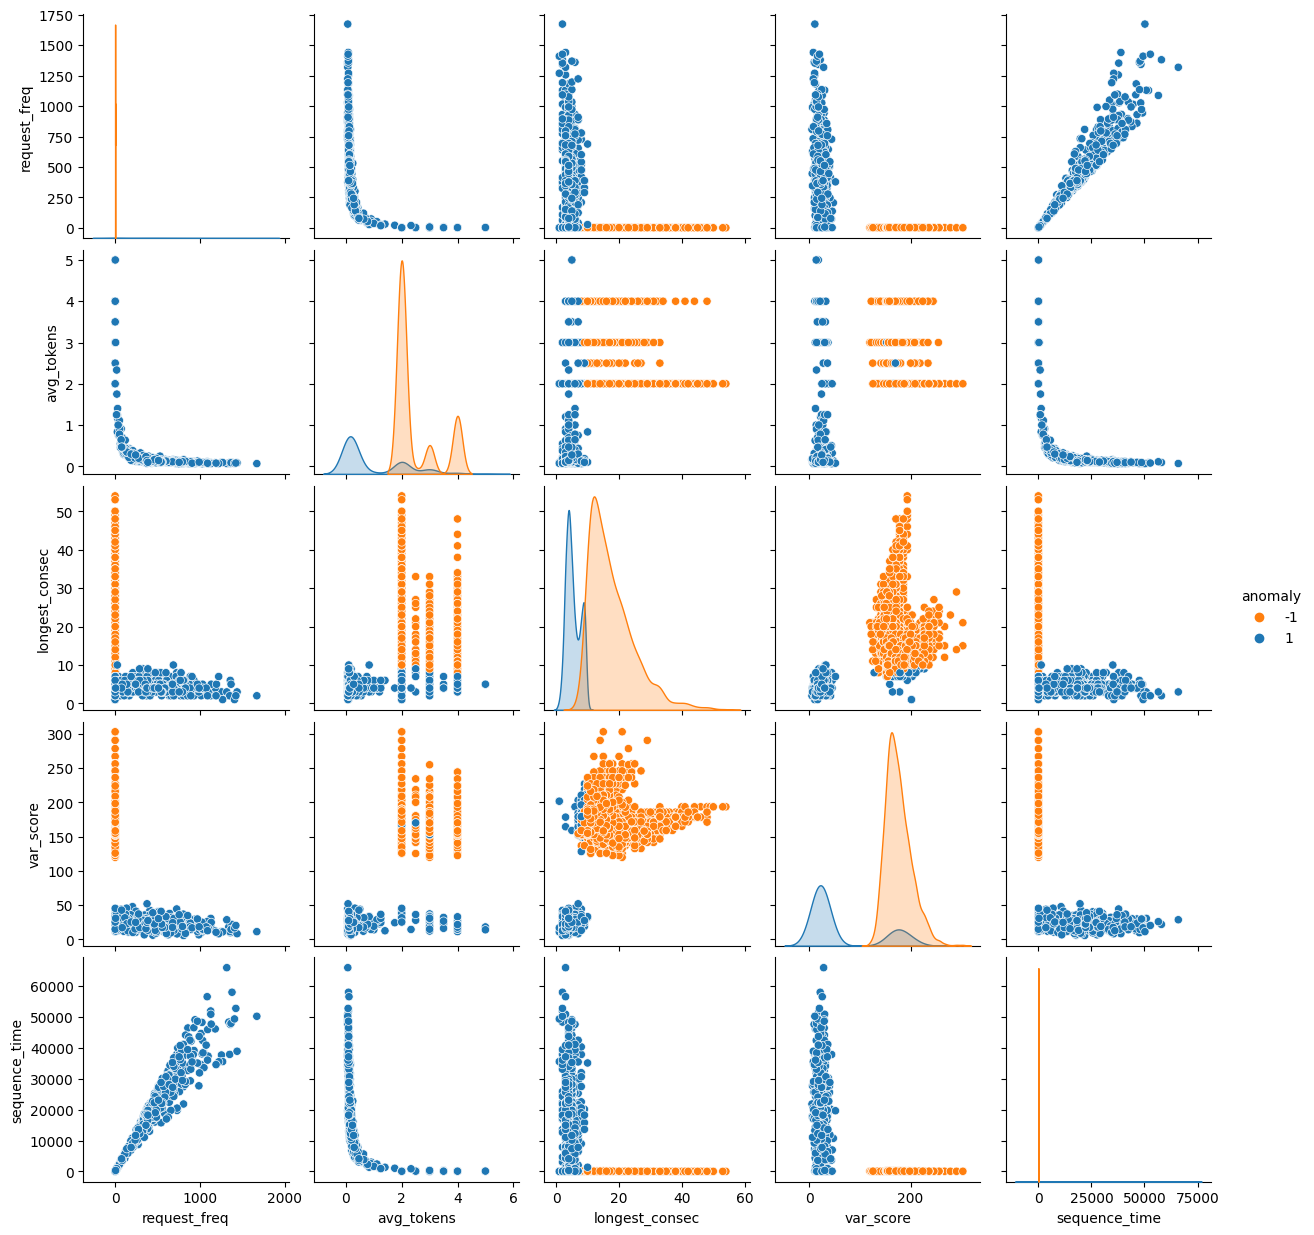

In [7]:
#Plots showcasing the outliers detected by isolation forest
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_anomaly_test, vars=anomaly_inputs, hue='anomaly', palette=palette)